In [2]:
# Preprocessing & Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Step1:Load and clean dataset

In [3]:

df = pd.read_csv('New_Cleaned_Data.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Remove 'Unnamed' column

In [5]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB
None


In [6]:
print(df.head())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


# Step2: Summary Statistics


In [7]:

# Descriptive statistics for numerical columns
print(df.describe())




              Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000000            25.000000  250000.000000


In [8]:
# Unique values for categorical columns
for col in ['Gender', 'Education Level', 'Job Title']:
    print(f"\n{col}:\n", df[col].value_counts())


Gender:
 Gender
Male      194
Female    179
Name: count, dtype: int64

Education Level:
 Education Level
Bachelor's    224
Master's       98
PhD            51
Name: count, dtype: int64

Job Title:
 Job Title
Director of Marketing             12
Director of Operations            11
Senior Business Analyst           10
Senior Marketing Manager           9
Senior Marketing Analyst           9
                                  ..
Junior Social Media Specialist     1
Junior Operations Coordinator      1
Senior HR Specialist               1
Director of HR                     1
Junior Financial Advisor           1
Name: count, Length: 174, dtype: int64


# Step 3: Distribution of Salary


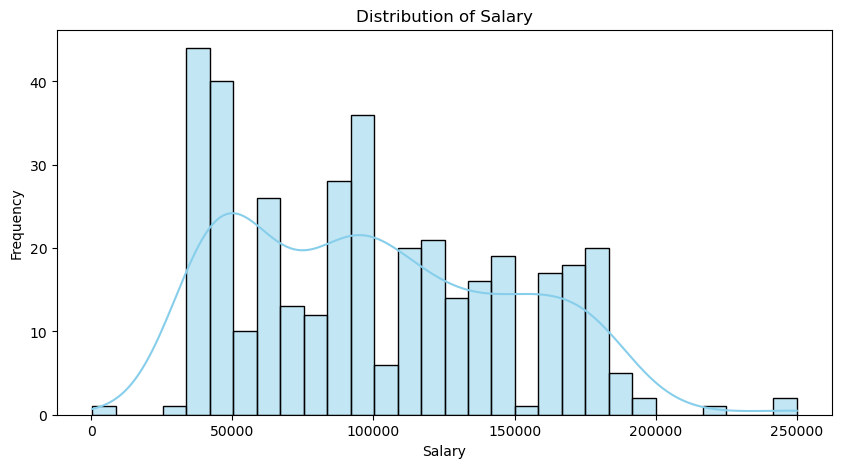

In [9]:

plt.figure(figsize=(10,5))
sns.histplot(df['Salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# **Insight**: This helps identify salary skewness and the presence of outliers

Interpretation:
The graph shows the distribution of salaries. The distribution appears right-skewed, indicating that most individuals earn lower salaries, while a smaller number of individuals have very high salaries (outliers).



# Step 4: Age vs Salary


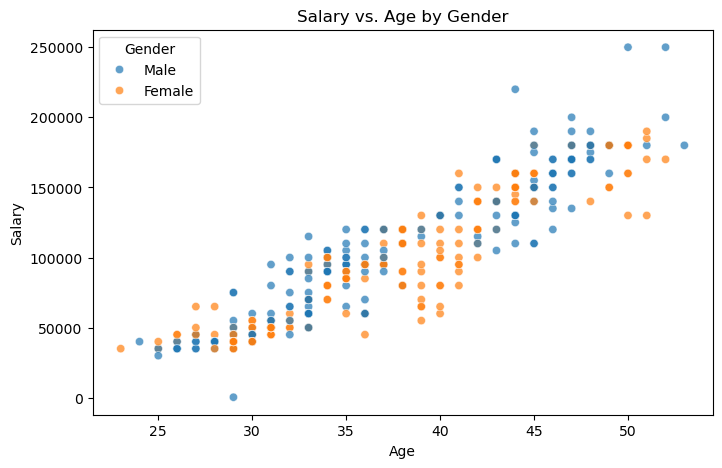

In [10]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Salary', hue='Gender', alpha=0.7)
plt.title('Salary vs. Age by Gender')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend(title='Gender')
plt.show()
# Insight: Shows trends across age and salary distribution by gender.



Interpretation:
The scatter plot shows that salary tends to increase with age, but not uniformly. There's wide variability across age groups, and gender-wise patterns may suggest slight differences, although both genders are represented across the salary spectrum.



# Step 5: Education Level vs Salary


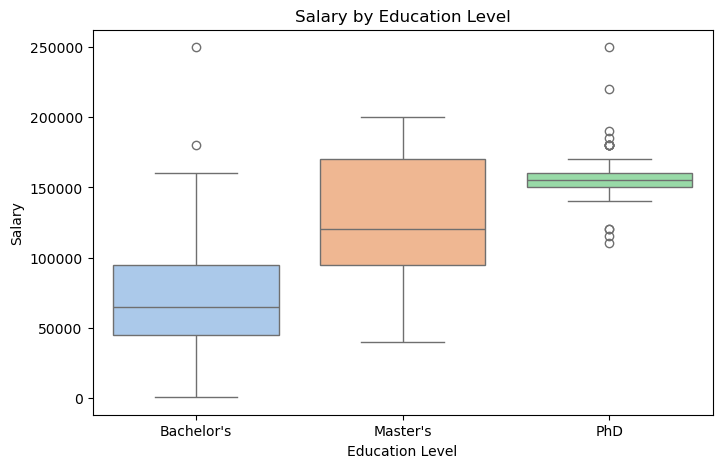

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Education Level', y='Salary', palette='pastel')
plt.title('Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.show()
# Insight: Shows if higher education levels lead to higher pay.



Interpretation:
The boxplot indicates that individuals with PhDs have the highest median salaries, followed by Master’s and then Bachelor's degree holders. There are some high-salary outliers in each category, especially in the PhD group.



# Step 6: Job Title Analysis (Top 10)



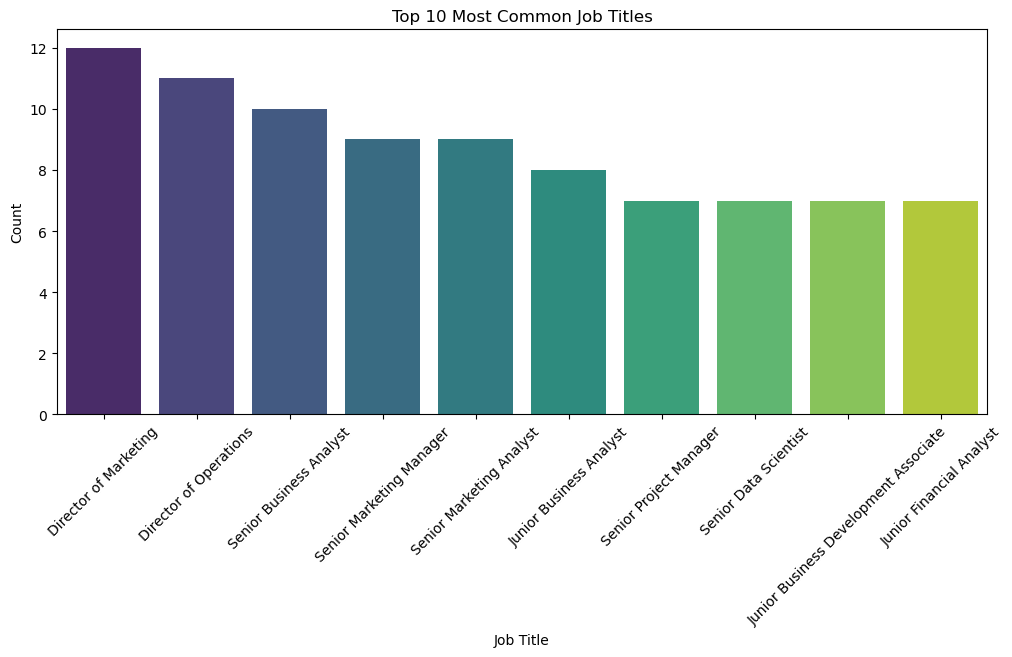

In [12]:


top_jobs = df['Job Title'].value_counts().head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=top_jobs.index, y=top_jobs.values, palette='viridis')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Interpretation:
This bar chart highlights the most frequently occurring job titles in the dataset. These roles represent the most common career paths or positions in the dataset, potentially affecting salary trends.



# Step 7: Gender Distribution


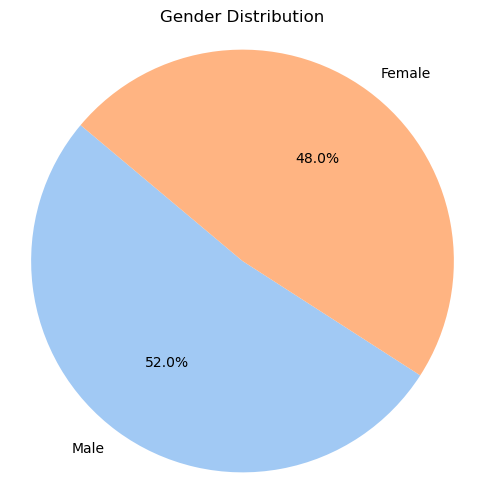

In [13]:

gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


Interpretation:
The pie chart shows the proportion of male vs. female employees in the dataset. It helps identify if there's a gender imbalance, which may impact average salary and role distribution.



# Step 8: Education Level Count


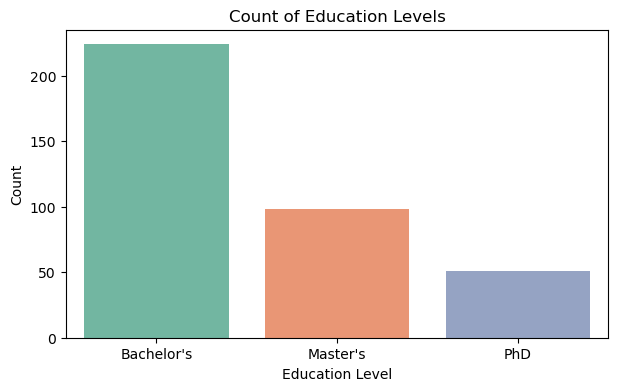

In [14]:

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Education Level', palette='Set2')
plt.title('Count of Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


Interpretation:
This plot shows how many people fall into each education level. It reveals that Bachelor’s degree holders are most common, followed by Master’s and PhDs. The distribution may affect overall salary trends.



# Step 9: Years of Experience vs Salary


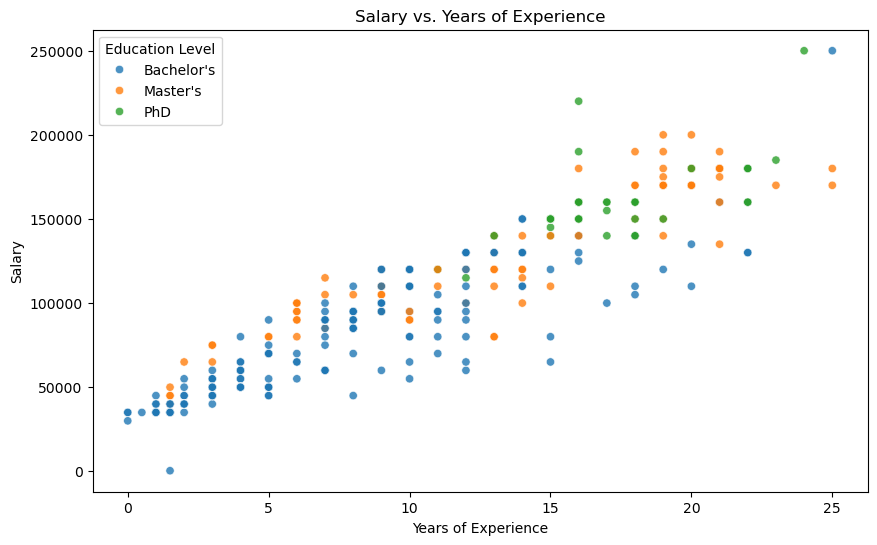

In [15]:

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Years of Experience', y='Salary', hue='Education Level', alpha=0.8)
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend(title='Education Level')
plt.show()
# Insight: Reveals correlation between experience and salary across education levels.

Interpretation:
This scatter plot shows that salary generally increases with more experience, especially for those with higher education levels. However, some high-paying jobs appear even at lower experience levels, possibly due to job roles or industries.



# Step 10: Correlation Heatmap


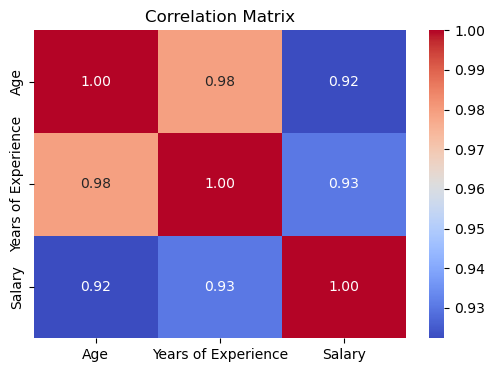

In [16]:

plt.figure(figsize=(6,4))
corr = df[['Age', 'Years of Experience', 'Salary']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Interpretation:
The heatmap shows a strong positive correlation between Years of Experience and Age (as expected), and a moderate positive correlation between Experience and Salary, indicating that more experience generally leads to higher pay.

